<a href="https://colab.research.google.com/github/vlada-kazantsevaa/homeworks/blob/main/Homeworks/hw-2/HW_2_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the 3rd and 4th seminars for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do! It is also your responsibility to test your own code.
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

<font color=#c30>**Disclaimer:**</font> it is expected that you WON'T get good metrics with this dataset. We encourage experimentation with data and models to improve the result, but a low final metric will not affect your grade.

# Tasks <font color=#c30>**[8]**</font>

### Exploratory Data Analysis <font color=#c30>**[2.5]**</font>

<font color=#c30>**[0.1]**</font> Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* TG - триглицериды, тип жиров (липидов) в крови, которые служат запасом энергии. высокие уровни TG ассоциированы с метаболическим синдромом, ожирением, диабетом и повышенным риском сердечно-сосудистых заболеваний. фактически, они показывают сколько “энергии-жира” циркулирует и обычно с возрастом, неправильным питанием, диабетом TG повышаются
* APOE - ген аполипопротеина E, кодирует белок участвующий в транспорте и переработке липидов и холестерина. разные генотипы APOE (e2, e3, e4) влияют на распределение липидов и риск сердечно-сосудистых и неврологических заболеваний. фактически, это ген, который влияет на перераспределение холестерина и жиров в теле, разные варианты которого связаны с тем, как хорошо организм перерабатывает жиры и холестерин.
* rs174548 - SNP (однонуклеотидный полиморфизм) в генетическом регионе, связанном с FADS1, фермент, участвующий в десатурации жирных кислот. эта вариация объясняет значимую долю вариации метаболитов липидов, например фосфатидилхолинов, и связана с уровнями холестерина и липидов в крови. то есть это маленькая генетическая вариация (SNP) в гене FADS1, участвует в модификации жирных кислот. люди с разными версиями этой SNP могут иметь разные уровни липидов в крови.
* rs4775041 - SNP, расположенный вблизи гена LIPC (hepatic lipase). в исследованиях он ассоциируется с концентрациями липидов, например, фосфатидилетаноламинов и с HDL/триглицеридами. то есть это щё один SNP, только связанный с геном LIPC, он участвует в разборе жиров (в особенности липопротеинов) в печени и помогает контролировать уровни жиров и холестерина.

You can (and should!) use this information when interpreting results.

Download the data:

In [34]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 32.0MB/s]


In [35]:
import pandas as pd

df = pd.read_csv("/content/Data-Cholesterol-V2.csv")

# хочу узнать размер и посмотреть первые строки чтобы визуально увидеть данные
print("shape:", df.shape)
display(df.head())

# общая информация о данных
df.info()

# пропуски
print("\nmissing values per column:")
print(df.isna().sum())

shape: (400, 10)


,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
4,1,52,175,34.1,328,2,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DM         400 non-null    int64  
 1   age        400 non-null    int64  
 2   chol       400 non-null    int64  
 3   BMI        363 non-null    float64
 4   TG         400 non-null    int64  
 5   APOE       400 non-null    int64  
 6   rs174548   400 non-null    int64  
 7   rs4775041  400 non-null    int64  
 8   HTN        400 non-null    int64  
 9   chd        400 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.4 KB

missing values per column:
DM            0
age           0
chol          0
BMI          37
TG            0
APOE          0
rs174548      0
rs4775041     0
HTN           0
chd           0
dtype: int64


<font color=#c30>**[0.5]**</font> Know your data, make relevant data analysis and explain:
 * What types of variables there are
 * Your strategy about NaN values, if any present
 * Your strategy about categorical columns, if any present

In [36]:
# Загружаем данные
df = pd.read_csv("/content/Data-Cholesterol-V2.csv")

# снова общая информация о типах данных
print("\ngeneral info")
df.info()

# о пропусках
print("\nmissing values")
print(df.isna().sum())

# первые строки для визуализации
print("\nfirst strings")
display(df.head())

# статистика по числовым признакам
print("\ngeneral statistics")
display(df.describe())


general info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DM         400 non-null    int64  
 1   age        400 non-null    int64  
 2   chol       400 non-null    int64  
 3   BMI        363 non-null    float64
 4   TG         400 non-null    int64  
 5   APOE       400 non-null    int64  
 6   rs174548   400 non-null    int64  
 7   rs4775041  400 non-null    int64  
 8   HTN        400 non-null    int64  
 9   chd        400 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.4 KB

missing values
DM            0
age           0
chol          0
BMI          37
TG            0
APOE          0
rs174548      0
rs4775041     0
HTN           0
chd           0
dtype: int64

first strings


,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
4,1,52,175,34.1,328,2,0,0,1,0



general statistics


,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
count,400.00000,400.000000,400.00000,363.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.50250,54.822500,183.91500,24.954821,178.687500,3.930000,0.497500,0.565000,0.787500,0.317500
std,0.50062,14.430231,22.11777,3.120144,86.574319,0.909488,0.617208,0.621886,0.409589,0.466087
min,0.00000,30.000000,117.00000,19.400000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,43.000000,168.00000,22.650000,114.750000,4.000000,0.000000,0.000000,1.000000,0.000000
50%,1.00000,55.000000,184.00000,24.500000,156.500000,4.000000,0.000000,0.000000,1.000000,0.000000
75%,1.00000,67.000000,199.25000,26.750000,234.500000,4.000000,1.000000,1.000000,1.000000,1.000000
max,1.00000,80.000000,247.00000,38.800000,671.000000,6.000000,2.000000,2.000000,1.000000,1.000000


Assuming your data is now certainly clean, you can start looking at the features.

<font color=#c30>**[1.75]**</font>
* Apply strategies you described above.
* Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.
* Explore the relationship of features and interpret it if possible.
* Deal with outliers and other dataset artifacts, if needed.



Shape: (400, 14)


,DM,age,chol,BMI,TG,rs174548,rs4775041,HTN,chd,APOE_2,APOE_3,APOE_4,APOE_5,APOE_6
0,1,74,215,26.2,367,1,2,1,1,False,False,True,False,False
1,1,51,204,24.7,150,2,1,1,1,False,False,True,False,False
2,0,64,205,24.2,213,0,1,1,0,False,False,True,False,False
3,0,34,182,23.8,111,1,1,1,0,True,False,False,False,False
4,1,52,175,34.1,328,0,0,1,0,True,False,False,False,False


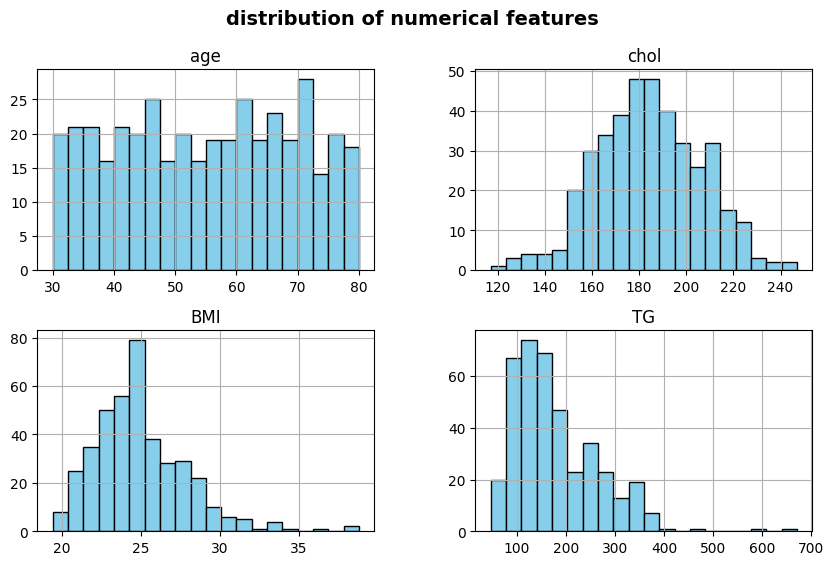

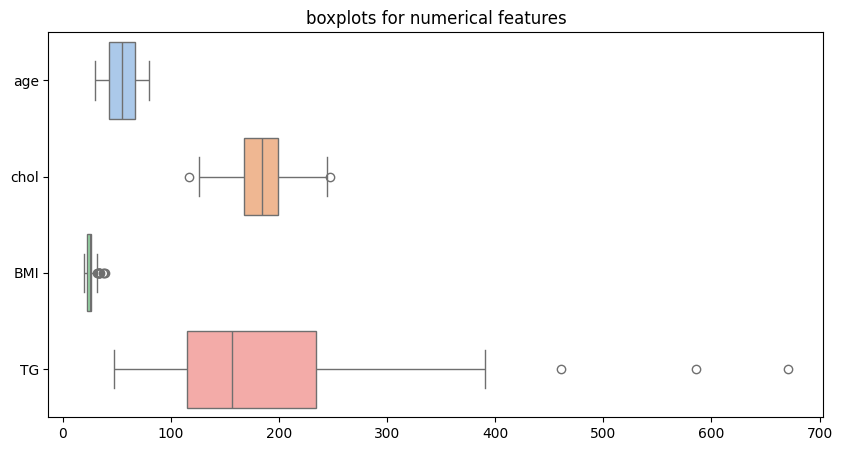

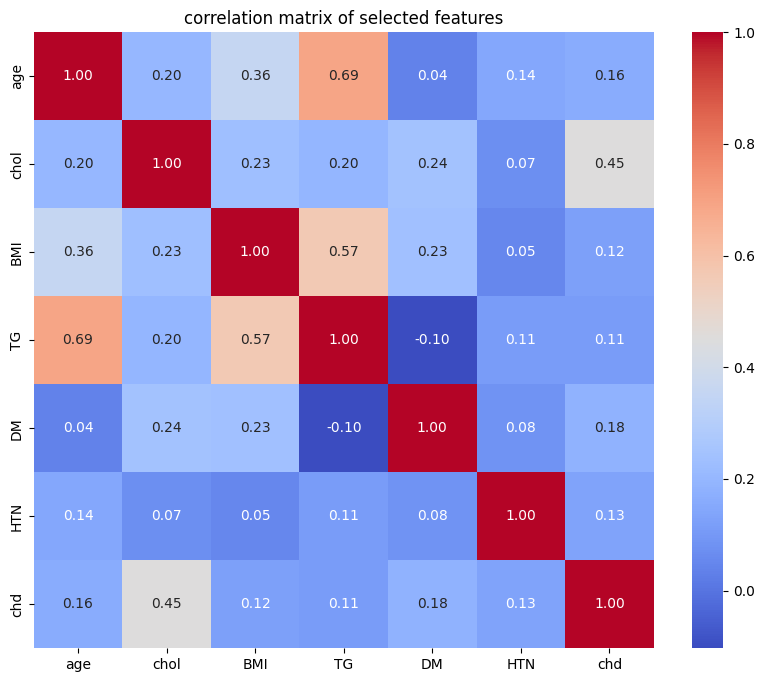

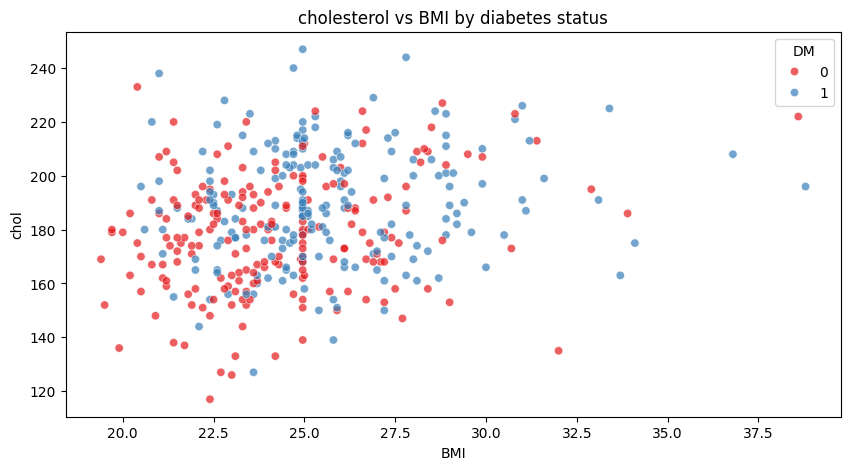

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# тк в bmi есть 37 пропусков, то их нужно чем-то заменить
# я заменила средним значением, тк разброс небольшой, но можно и медианой
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

# обработка apoe как категориального признака
# иначе компьютер будет воспринимать цифры как цифры, а по факту 6 в этом случае не больше 1, а просто число
df = pd.get_dummies(df, columns=['APOE'], prefix='APOE', drop_first=True)

# проверка что получилось с таблицей после преобразований
print("\nShape:", df.shape)
display(df.head())

# визуализации здесь чтобы понять структуру данных, а не вслепую строить модель

num_cols = ["age", "chol", "BMI", "TG"]

# визуалиация 1
# смотрим распределение числовых признаков
df[num_cols].hist(bins=20, figsize=(10,6), color="skyblue", edgecolor="black")
plt.suptitle("distribution of numerical features", fontsize=14, fontweight="bold")
plt.show()

# визуализация 2
# выявляем возможные выбросы
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols], orient="h", palette="pastel")
plt.title("boxplots for numerical features")
plt.show()

# визуализация 3
# смотрим на свзяь между признаками (положительная/отрицательная)
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols + ["DM","HTN","chd"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation matrix of selected features")
plt.show()

# визуализация 4
# связь между уровнем холестерина и ИМТ
plt.figure(figsize=(10,5))
sns.scatterplot(x="BMI", y="chol", data=df, hue="DM", palette="Set1", alpha=0.7)
plt.title("cholesterol vs BMI by diabetes status")
plt.show()

# TG имеет очень широкий разброс поэтому обрезаем его по 99 перцентилю
for col in ["TG", "chol"]:
    q99 = df[col].quantile(0.99)
    df[col] = np.where(df[col] > q99, q99, df[col])

<font color=#c30>**[0.15]**</font> Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers?

Потому что числовые значения подразумевают порядок и расстояние, что 6 больше 1, а между 3 и 5 - разница в 2. в категориях (такие признаки как APOE) нет порядка, за цифрами скрываются категории, а не значения.
в качестве решения используют one-hot encoding (выше он есть)

* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why?

Да, потому что id однозначно идентифицирует каждое наблюдение (как первичный ключ), но не имеет никакого биологического значения, соответственно модель может запомнить конкретные идентификаторы, а не изучить общие взаимосвязи, что приведет к переобучению и плохой обобщаемости.

### Machine Learning <font color=#c30>**[5.5]**</font>

<font color=#c30>**[0.25]**</font> Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# целевая переменная
y = df["chol"]

# признаки - все кроме целевой
X = df.drop(columns=["chol"])

# делим данные на train/test (80/20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("train size:", X_train.shape)
print("test size:", X_test.shape)

train size: (320, 13)
test size: (80, 13)


для задачи регрессии подходят метрики:
* MAE (mean absolute error) — средняя абсолютная ошибка;
* MSE (mean squared error) — квадратичная ошибка (штрафует сильнее за выбросы);
* R^2 (коэф. детерминации) показывает, какая доля дисперсии объяснена моделью и по нему отслеживается, что наша модель действительно что-то может объяснить, а не ведет себя хуже чем простое среднее.

для модели оставила метрики MAE и R^2.

<font color=#c30>**[0.15]**</font> Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models?

потому что множество алгоритмов (линейная регрессия, KNN, SVM, PCA и др.)
чувствительны к разным диапазонам значений признаков, то есть если один признак измеряется в сотнях, а другой в десятках (как у нас TG и BMI соответственно), то модель начнёт считать первый более важным, просто из-за его масштаба. масштабирование же делает все признаки с одинаковым вкладом в расчёт весов модели.

* Why do you think we don't produce scaling of One Hot encoded features?

Потому что one-hot признаки уже состоят из 0 и 1 и тд, их смысл в наличие или отсутствие категории, а не в цифровом значении, если их масштабировать,
то потеряется смысл, так как с большой вероятностью появятся дробные значения.

<font color=#c30>**[0.25]**</font> Apply transformation to data, if needed. Justfy your choice.

In [40]:
# для TG лог-преобразование и winsorization правого хвоста
# log для TG убирает правый перекос и стабилизирует дисперсию, благодаря этом линейные модели/регуляризация ведут себя устойчивее
# winsorization для TG и chol уменьшает влияние редких экстремумов на обучение
df["TG_log"] = np.log1p(df["TG"])

for col in ["TG", "chol"]:
    q99 = df[col].quantile(0.99)
    df[col] = np.minimum(df[col], q99)

# формируем признаки и цель
y = df["chol"]
num_cont = ["age", "BMI", "TG_log", "rs174548", "rs4775041"]
oh_cols = [c for c in df.columns if c.startswith("APOE_")]
bin_cols = ["DM", "HTN", "chd"]

X = df[num_cont + oh_cols + bin_cols]

# масштабируем только непрерывные признаки
# масштабирование приводит признаки к сопоставимому масштабу, что дает нам корректные веса и лучшее обучение вследствие
# one-hot признаки и бинарные не масштабируем
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# train/test split (тот же random_state)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train = X_train.copy()
X_test = X_test.copy()
X_train[num_cont] = scaler.fit_transform(X_train[num_cont])
X_test[num_cont] = scaler.transform(X_test[num_cont])

print("shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

shapes: (320, 13) (80, 13) (320,) (80,)


<font color=#c30>**[0.25]**</font> Train a simple linear regression model, and rank it using test set. How well the model is doing?

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# обучение
lr = LinearRegression()
lr.fit(X_train, y_train)

# предсказания и метрики
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {r2:.3f}")
print(f"MAE: {mae:.2f}")

R^2: 0.227
MAE: 14.86


<font color=#c30>**[0.1]**</font> Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones?

нет, наибольшие веса в модели линейной регрессии не всегда означают наибольшую важность признака. величина коэффициента зависит от масштаба данных и взаимной корреляции признаков, то есть если один из них измеряется в больших числах или сильно связан с другими, его вес может быть искусственно уменьшен или увеличен. кроме того, при наличии мультиколлинеарности модель распределяет влияние между признаками произвольно, и абсолютное значение коэффициента перестаёт напрямую отражать значимость переменной

<font color=#c30>**[0.25]**</font> Obtain weights of the linear regression equation for this model and interpret them.

In [42]:
# коэффициенты и сдвиг (intercept)
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coef": lr.coef_
}).sort_values(by="coef", key=abs, ascending=False)

print("intercept (свободный член):", lr.intercept_)
display(coef_df)

intercept (свободный член): 168.83514078826008


,feature,coef
6,APOE_3,26.027726
8,APOE_5,19.247063
12,chd,18.220957
9,APOE_6,15.456240
7,APOE_4,8.137653
10,DM,6.581461
11,HTN,-3.948571
5,APOE_2,-3.180364
3,rs174548,2.885947
1,BMI,2.502922


в целом по выводу выше модель показывает, что на уровень холестерина в наибольшей степени влияют варианты гена APOE и наличие сердечно-сосудистых заболеваний (chd), демографические же и метаболические факторы (возраст, BMI, диабет) оказывают умеренное влияние, а генетические SNP-маркеры (rs174548, rs4775041) минимальное

<font color=#c30>**[0.25]**</font>
* What are residuals?
* Make a residuals vs predictions plot below.
* What do you observe?

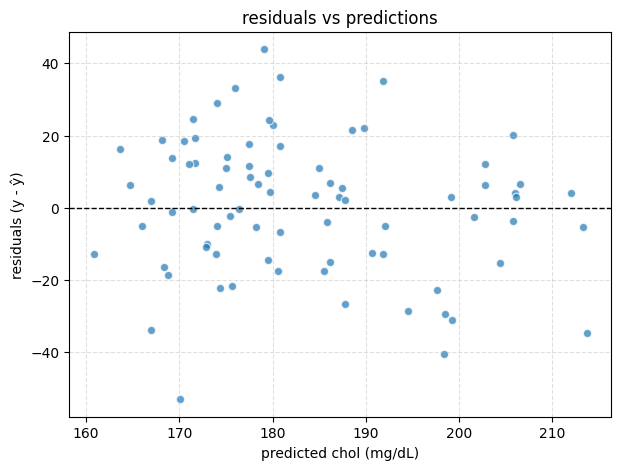

In [43]:
# резидуалы (остатки)
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor="white")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("predicted chol (mg/dL)")
plt.ylabel("residuals (y - ŷ)")
plt.title("residuals vs predictions")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

точки расположены достаточно хаотично вокруг нулевой линии, без выраженного тренда или систематического смещения вверх или вниз, можем сделать вывод, что линейная модель в целом адекватно описывает среднюю зависимость, но делает это с шумом, то есть предсказания не имеют систематической ошибки, однако разброс остатков достаточно велик, это признак того, что в модели не хватает факторов, объясняющих вариацию уровня холестерина.

разброс выше нуля чуть-чуть больше, чем внизу (хоть и без выраженной асиметрии), это может указывать на то, что модель иногда недооценивает значения холестерина у части пациентов.

можно сделать вывод что линейная модель не переобучена, но её точность ограничена.
(R^2: 0.227
MAE: 14.86)
фактически коэф. детерминации показывает, что модель объясняет 22,7 процента вариации уровня холестерина в данных. это довольно низкое значение, так как фактически большая часть разброса фактических значений остаётся необъяснённой.
средняя абсолютная ошибка показывает, что в среднем предсказания модели отличаются от реальных значений уровня холестерина примерно на 15 мг/дл. для клиники это заметное отклонение, то есть модель даёт лишь приближённые прогнозы.

<font color=#c30>**[0.25]**</font> Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

best lasso alpha (by R^2): 0.36652 | R^2=0.278 | MAE=14.60


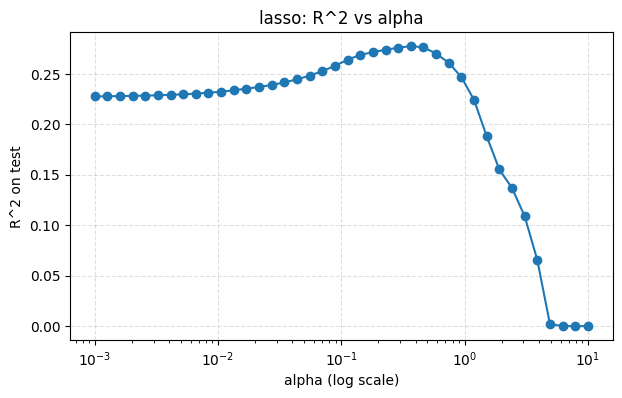

In [45]:
from sklearn.linear_model import Lasso

# логарифмическая сетка
alphas = np.logspace(-3, 1, 40)
r2_scores, maes = [], []

for a in alphas:
    model = Lasso(alpha=a, max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))

best_idx = int(np.argmax(r2_scores))
best_alpha_lasso = alphas[best_idx]
print(f"best lasso alpha (by R^2): {best_alpha_lasso:.5f} | R^2={r2_scores[best_idx]:.3f} | MAE={maes[best_idx]:.2f}")

plt.figure(figsize=(7,4))
plt.semilogx(alphas, r2_scores, marker="o")
plt.xlabel("alpha (log scale)"); plt.ylabel("R^2 on test"); plt.title("lasso: R^2 vs alpha"); plt.grid(True, ls="--", alpha=0.4)
plt.show()

<font color=#c30>**[0.25]**</font> For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

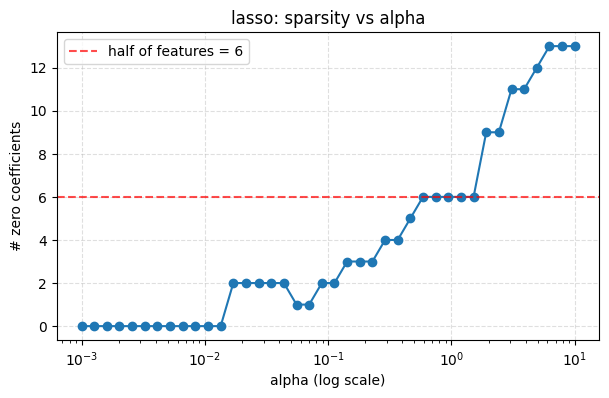

alpha for >=1/2 zeros: 0.58780 | R²=0.270 | MAE=14.79
delta(R^2) (best - half): +0.007 | delta(MAE): -0.19


In [48]:
zeros_per_alpha = []
n_features = X_train.shape[1]
half_features = n_features // 2

for a in alphas:
    m = Lasso(alpha=a, max_iter=10000, random_state=42)
    m.fit(X_train, y_train)
    zeros_per_alpha.append(np.sum(m.coef_ == 0.0))

plt.figure(figsize=(7,4))
plt.semilogx(alphas, zeros_per_alpha, marker="o")
plt.axhline(half_features, color="r", ls="--", alpha=0.7, label=f"half of features = {half_features}")
plt.xlabel("alpha (log scale)"); plt.ylabel("zero coefficients")
plt.title("lasso: sparsity vs alpha"); plt.legend(); plt.grid(True, ls="--", alpha=0.4)
plt.show()

# найдём первое alpha, при котором занулилось больше половины коэффициентов или половина
idx_half = next((i for i, z in enumerate(zeros_per_alpha) if z >= half_features), None)

alpha_half = alphas[idx_half]
m_half = Lasso(alpha=alpha_half, max_iter=10000, random_state=42).fit(X_train, y_train)
yph = m_half.predict(X_test)
r2_half = r2_score(y_test, yph)
mae_half = mean_absolute_error(y_test, yph)
print(f"alpha for >=1/2 zeros: {alpha_half:.5f} | R²={r2_half:.3f} | MAE={mae_half:.2f}")
# потеря качества относительно лучшего по R^2 из начала
print(f"delta(R^2) (best - half): {r2_scores[best_idx] - r2_half:+.3f} | delta(MAE): {maes[best_idx] - mae_half:+.2f}")

<font color=#c30>**[0.5]**</font> Train and optimize hyperparameters for Elastic Net, Ridge and Lasso models. Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

In [53]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge, ElasticNet

# alpha для всех моделей в log-scale чтобы покрыть слабую и сильную регуляризации
# elasticnet чтобы подобрать alpha и l1_ratio в типичных точках
param_grids = {
    "ridge": {"alpha": np.logspace(-3, 2, 20)},
    "lasso": {"alpha": np.logspace(-3, 1, 20)},
    "elasticnet":  {"alpha": np.logspace(-3, 1, 12), "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}
}

# при 400 наблюдениях 5 фолдов дают надёжную оценку обобщающей способности без чрезмерных затрат и переоценки дисперсии
# можно и 10, но получится медленее
cv = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "ridge": Ridge(random_state=42),
    "lasso": Lasso(max_iter=10000, random_state=42),
    "elasticnet":  ElasticNet(max_iter=10000, random_state=42)
}

gs_results = {}

for name, est in models.items():
    gs = GridSearchCV(
        est,
        param_grids[name],
        scoring="r2",
        cv=cv,
        n_jobs=-1,
        refit=True,
        verbose=0
    )
    gs.fit(X_train, y_train)
    gs_results[name] = gs

    # код получился в два раза длинее чем мог бы ради красивого формата вывода
    best_params = {
        k: (float(v) if isinstance(v, (np.floating, float)) else v)
        for k, v in gs.best_params_.items()
    }
    formatted_params = {k: round(v, 4) if isinstance(v, float) else v for k, v in best_params.items()}

    print(f"{name.upper():<10} | best params: {formatted_params} | best CV R²: {gs.best_score_:.3f}")

RIDGE      | best params: {'alpha': 8.8587} | best CV R²: 0.284
LASSO      | best params: {'alpha': 0.2069} | best CV R²: 0.282
ELASTICNET | best params: {'alpha': 0.0658, 'l1_ratio': 0.7} | best CV R²: 0.285


<font color=#c30>**[1]**</font> Use test set to rank optimized models. Describe and interpret results.

In [56]:
rows = []
for name, gs in gs_results.items():
    m = gs.best_estimator_
    yp = m.predict(X_test)
    rows.append({
        "model": name.upper(),
        "R2": r2_score(y_test, yp),
        "MAE": mean_absolute_error(y_test, yp),
        "best_params": gs.best_params_
    })

rank_df = pd.DataFrame(rows)
rank_df[["R2", "MAE"]] = rank_df[["R2", "MAE"]].round(3)
rank_df = rank_df.sort_values(by="R2", ascending=False).reset_index(drop=True)
display(rank_df)

,model,R2,MAE,best_params
0,LASSO,0.273,14.495,{'alpha': 0.20691380811147903}
1,RIDGE,0.270,14.525,{'alpha': 8.858667904100823}
2,ELASTICNET,0.270,14.522,"{'alpha': 0.06579332246575682, 'l1_ratio': 0.7}"


<font color=#c30>**[1]**</font> Perform a feature importance analysis for all models, interpret the results, and make appropriate comparisons.

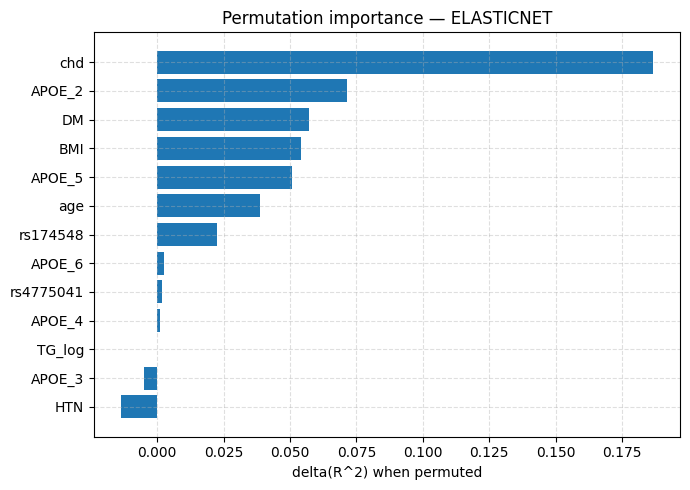

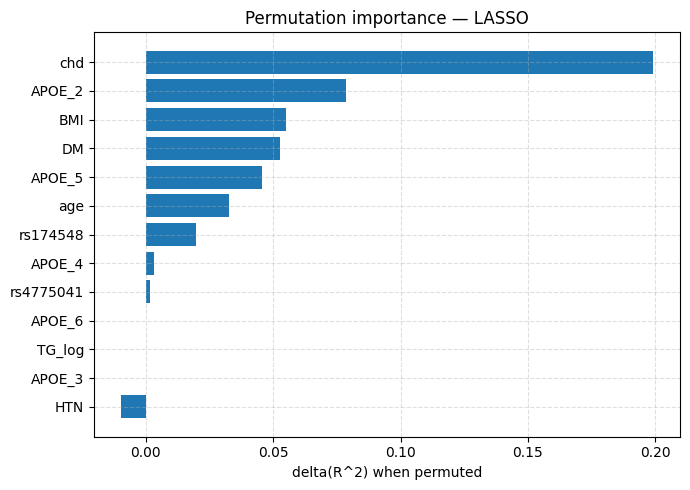

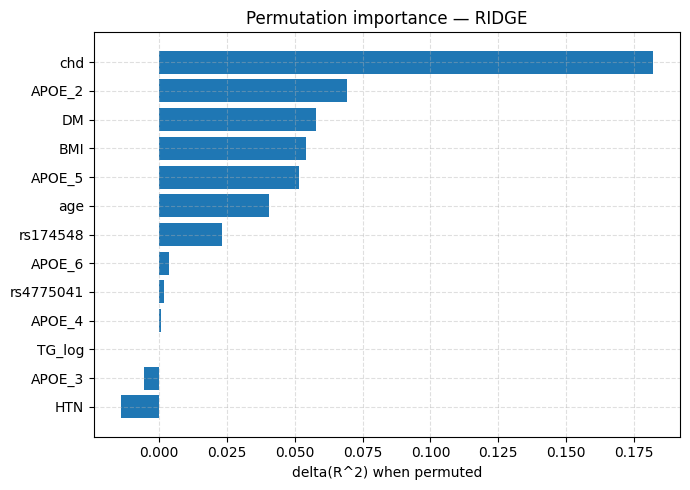

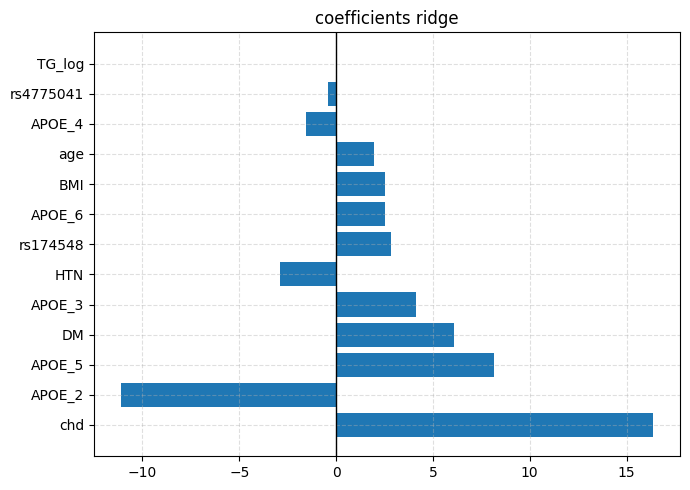

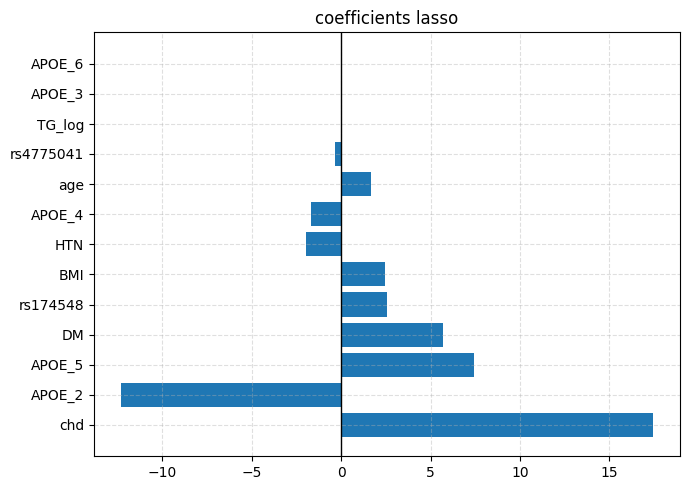

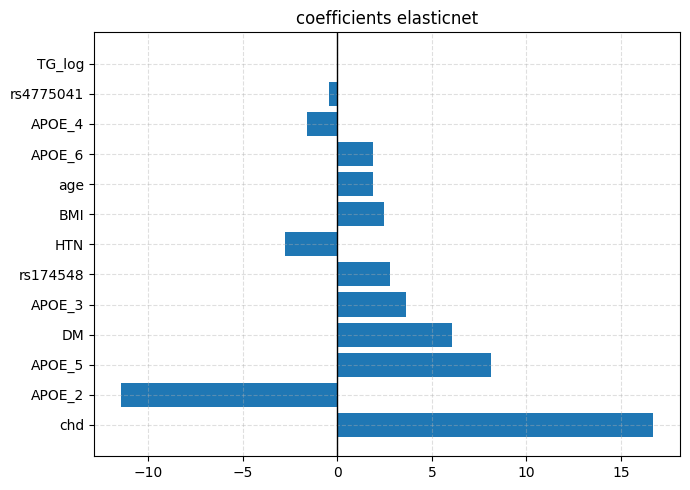

In [59]:
from sklearn.inspection import permutation_importance

def permutation_importances(estimator, X, y, name, n_repeats=20):
    r = permutation_importance(estimator, X, y, n_repeats=n_repeats, random_state=42, n_jobs=-1, scoring="r2")
    imp = pd.DataFrame({"feature": X.columns, "importance": r.importances_mean})
    imp["model"] = name
    return imp.sort_values("importance", ascending=False)

all_imps = []
for name, gs in gs_results.items():
    est = gs.best_estimator_
    imps = permutation_importances(est, X_test, y_test, name=name.upper(), n_repeats=30)
    # первые 15 для обзора
    all_imps.append(imps.head(15))

imp_df = pd.concat(all_imps, ignore_index=True)

# визуализация топ фич для каждой модели
g = imp_df.groupby("model")
for model_name, sub in g:
    plt.figure(figsize=(7,5))
    sub = sub.sort_values("importance", ascending=True)
    plt.barh(sub["feature"], sub["importance"])
    plt.title(f"Permutation importance {model_name}")
    plt.xlabel("delta(R^2) when permuted")
    plt.grid(True, ls="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

# веса для линейных моделей (по модулю)
for name in ["ridge", "lasso", "elasticnet"]:
    est = gs_results[name.lower()].best_estimator_
    coef_tbl = pd.DataFrame({"feature": X_train.columns, "coef": est.coef_})
    coef_tbl["abs_coef"] = coef_tbl["coef"].abs()
    coef_tbl = coef_tbl.sort_values("abs_coef", ascending=False).head(15)
    plt.figure(figsize=(7,5))
    plt.barh(coef_tbl["feature"], coef_tbl["coef"])
    plt.title(f"coefficients {name}")
    plt.axvline(0, color="k", lw=1)
    plt.grid(True, ls="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

<font color=#c30>**[1]**</font> Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.

Лучше всего с данными о холестерине повела себя модель elasticnet судя по самому высокому значению R^2 и наименьшим ошибками на тестовых данных. в целом, это логично, так как elasticnet сочетает в себе L1-регуляризацию (как lasso отбрасывает незначимые признаки) и L2-регуляризацию (как ridge сглаживает влияние коррелирующих переменных). в нашем наборе данных признаки частично коррелируют между собой, и elasticnet благодаря смешанному штрафу справляется с этим лучше, чем модели по-отдельности.

* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical?

наиболее важными предикторами уровня холестерина во всех моделях оказались наличие ишемической болезни сердца (CHD), варианты APOE, индекс массы тела (BMI) и диабет (DM). это логично, потому что в целом мутации в гене APOE напрямую связаны с липидным обменом и риском гиперхолестеринемии, а ожирение и диабет являются факторами, сильно влияющими на метаболизм холестерина. возраст и артериальная гипертензия также имеют логичное, но менее выраженное влияние.

* Would you suggest to use that model to a doctor or use it in a real study?

эту модель можно рассматривать для исследований, но не клиники, диагностики или прогнозирования. значение коэф. детерминации все же низкое, то есть модель объясняет лишь часть вариации уровня холестерина, также её предсказательная точность тоже недостаточна для практического применения. кроме того данные ограничены по размеру и по числу включённых биомаркеров. но модель на elasticnet может быть полезна для выявления факторов риска или отбора переменных для последующего анализа с более сложными моделями и большими выборками.

# Extra points <font color=#c30>**[2]**</font>

In this part, you are tasked with implementing and testing two gradient descent methods for linear regression: classical GD and it's stochastic version. First, we generate some synthetic data for you to test on. You can change the values of variables, but note that your code should work with any given values.

In [ ]:
n_features = 5
n_objects = 1500

# Generate true weights
w_true = np.random.normal(size=(n_features,))

# Generate features and target variable based on true weights
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))

# Generate random initial weights
w_0 = np.random.uniform(-2, 2, (n_features))

* Implement GD and SGD for linear regression from scrath. You can reuse code from seminar.
* Implemented methods must work with any number of input features.

In [ ]:
def GD(X, y, w_0, max_iter=500, learning_rate=0.05):
    """
    Implementation of Gradient Descent by scratch.

    :parameters:
    X : np.ndarray, shape (n_objects, n_features)
        Input matrix of features.
    y : np.ndarray, shape (n_features, )
        Target variable vector.
    w_0 : np.ndarray, shape (n_objects, )
        Initial weights vector.
    max_iter: int
        Maximum number of GD iterations.
    learning_rate: float
        Learning rate coefficient of GD.

    :returns: list, updated weights array and MSE scores history
    """

    # YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
    return [w, mse_scores]

def SGD(X, y, w_0, max_iter=500, batch_size=10, learning_rate=0.05):
    """
    Implementation of Stochastic Gradient Descent by scratch.

    :parameters:
    X : np.ndarray, shape (n_objects, n_features)
        Input matrix of features.
    y : np.ndarray, shape (n_features, )
        Target variable vector.
    w_0 : np.ndarray, shape (n_objects, )
        Initial weights vector.
    max_iter: int
        Maximum number of GD iterations.
    batch_size: int
        Batch size.
    learning_rate: float
        Learning rate coefficient of GD.

    :returns: list with updated weights array and MSE scores history
    """

    # YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
    return [w, mse_scores]

* Make a plot that represent how MSE changes with each step. Find out what learning rate and batch size work best for this case. Compare how quickly each method converges.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

* Do the same for cholesterol dataset. Is SGD applicable for this dataset or not?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ